# Demo notebook

This demo is for the team to test the ability of databricks to directly deploy a notebook created by local jupyter.

Several things tested in this notebook:

- access to necessary libraries
- simple plot
- simple widgets
- simple table
- dashboard layout?

In [1]:
from ipywidgets import interact

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Simple dropdown menu and seaborn

In [2]:
tips = sns.load_dataset('tips')

In [3]:
@interact(hue=['smoker', 'sex', 'time', 'day'])

def plot(hue):
    _ = sns.pairplot(tips, hue=hue)

interactive(children=(Dropdown(description='hue', options=('smoker', 'sex', 'time', 'day'), value='smoker'), O…

## Matplotlib chart

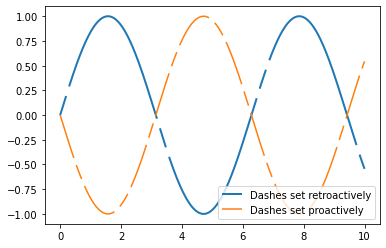

In [4]:
x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(x, np.sin(x), '--', linewidth=2,
                 label='Dashes set retroactively')
line1.set_dashes(dashes)

line2, = ax.plot(x, -1 * np.sin(x), dashes=[30, 5, 10, 5],
                 label='Dashes set proactively')

ax.legend(loc='lower right')
plt.show()

## Plotly test

**Test 1 - click handler**

In [5]:
import plotly.graph_objects as go


np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)

f

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
               …

**Test 2**

In [6]:
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

df = pd.read_csv(
    'https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)

In [7]:
month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date, month])

textbox = widgets.Dropdown(
    description='Airline:   ',
    value='DL',
    options=df['carrier'].unique().tolist()
)

origin = widgets.Dropdown(
    options=list(df['origin'].unique()),
    value='LGA',
    description='Origin Airport:',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='NYC FlightDatabase'
                        ),
                        barmode='overlay'
                    ))

In [8]:
def validate():
    if origin.value in df['origin'].unique() and textbox.value in df['carrier'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['carrier'] == textbox.value,
                               df['origin'] == origin.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['carrier'] == 'DL', df['origin'] == origin.value)]
            temp_df = df[filter_list]
        x1 = temp_df['arr_delay']
        x2 = temp_df['dep_delay']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Delay in Minutes'
            g.layout.yaxis.title = 'Number of Delays'


origin.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

In [9]:
container2 = widgets.HBox([origin, textbox])
widgets.VBox([container,
              container2,
              g])

## Test qgrid

In [10]:
import qgrid

In [11]:
randn = np.random.randn
df_types = pd.DataFrame({
    'A' : pd.Series(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09'],index=list(range(9)),dtype='datetime64[ns]'),
    'B' : pd.Series(randn(9),index=list(range(9)),dtype='float32'),
    'C' : pd.Categorical(["washington", "adams", "washington", "madison", "lincoln","jefferson", "hamilton", "roosevelt", "kennedy"]),
    'D' : ["foo", "bar", "buzz", "bippity","boppity", "foo", "foo", "bar", "zoo"] })
df_types['E'] = df_types['D'] == 'foo'
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

**After making changes**

In [12]:
qgrid_widget.get_changed_df()

,A,B,C,D,E
0,2013-01-01,0.077821,washington,foo,True
1,2013-01-02,0.618380,adams,bar,False
2,2013-01-03,0.232495,washington,buzz,False
3,2013-01-04,0.682551,madison,bippity,False
4,2013-01-05,-0.310117,lincoln,boppity,False
5,2013-01-06,-2.434838,jefferson,foo,True
6,2013-01-07,1.038825,hamilton,foo,True
7,2013-01-08,2.186980,roosevelt,bar,False
8,2013-01-09,0.441364,kennedy,zoo,False


## Test ipysheet

bqplot

In [13]:
import numpy as np
from traitlets import link
from ipywidgets import HBox
import bqplot.pyplot as bplt
from ipysheet import sheet, cell, column

# editing the table will change the chart

size = 18
scale = 100.
np.random.seed(0)
x_data = np.arange(size)
y_data = np.cumsum(np.random.randn(size)  * scale)

fig = bplt.figure()
axes_options = {'x': {'label': 'Date', 'tick_format': '%m/%d'},
                'y': {'label': 'Price', 'tick_format': '0.0f'}}

scatt = bplt.scatter(x_data, y_data, colors=['red'], stroke='black')
fig.layout.width = '70%'

sheet1 = sheet(rows=size, columns=2)
x_column = column(0, x_data)
y_column = column(1, y_data)

link((scatt, 'x'), (x_column, 'value'))
link((scatt, 'y'), (y_column, 'value'))

HBox((fig, sheet1))

**from and to dataframe**

In [14]:
import numpy as np
import pandas as pd
from ipysheet import from_dataframe, to_dataframe

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 26), index=dates, columns=list(chr(ord('A') + i) for i in range(26)))

sheet = from_dataframe(df)

In [15]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([False, True, False, False], dtype='bool'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2.loc[[0, 2], ['B']] = np.nan

sheet2 = from_dataframe(df2)
sheet2

Sheet(cells=(Cell(column_end=0, column_start=0, row_start=0, squeeze_row=False, type='numeric', value=[1.0, 1.…

after making changes

In [16]:
df3 = to_dataframe(sheet2)
df3

,A,B,C,D,E,F
0,1.0,NaT,1.0,False,test,foo
1,1.0,2013-01-02,1.0,True,train,foo
2,1.0,NaT,1.0,False,test,foo
3,1.0,2013-01-02,1.0,False,train,foo


**searching**

In [17]:
import numpy as np
import pandas as pd
from ipysheet import from_dataframe
from ipywidgets import Text, VBox, link

df = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20130102'),
                   'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                   'D': np.array([False, True, False, False], dtype='bool'),
                   'E': pd.Categorical(["test", "train", "test", "train"]),
                   'F': 'foo'})

df.loc[[0, 2], ['B']] = np.nan


s = from_dataframe(df)

search_box = Text(description='Search:')
link((search_box, 'value'), (s, 'search_token'))

VBox((search_box, s))

**wedgets**

In [18]:
from ipywidgets import FloatSlider, IntSlider, Image
import ipysheet

sheet = ipysheet.sheet()

slider = FloatSlider()

cell1 = ipysheet.cell(0, 0, slider, style={'min-width': '150px'})
cell3 = ipysheet.cell(2, 2, 42.)
cell_sum = ipysheet.cell(3, 2, 42.)

@ipysheet.calculation(inputs=[(cell1, 'value'), cell3], output=cell_sum)
def calculate(a, b):
    return a + b

sheet

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, style={'min-width': '150px'}, type='wi…